In [2]:
import os
import ast
import h5py
import pandas as pd
import geopandas as gpd

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
input_file = "data/combined_data4.geojson"
## Read combined data
combined_gdf = gpd.read_file(input_file)

In [4]:
print(combined_gdf.head())
print(combined_gdf.crs)
print(combined_gdf.columns.to_list())
combined_gdf.crs = "EPSG:25832"
print(combined_gdf.crs)
print(combined_gdf.shape)

                     id                                                B11  \
0  00000000000000001a6a  [ [ 0.28049999475479126, 0.28049999475479126, ...   
1  00000000000000001a6b  [ [ 0.2807999849319458, 0.2807999849319458, 0....   
2  00000000000000001a6c  [ [ 0.29300001263618469, 0.29969999194145203, ...   
3  00000000000000001a6d  [ [ 0.29730001091957092, 0.30210000276565552, ...   
4  00000000000000001a6e  [ [ 0.3059999942779541, 0.3059999942779541, 0....   

                                               B11_1  \
0  [ [ 0.30849999189376831, 0.30849999189376831, ...   
1  [ [ 0.21970000863075256, 0.21970000863075256, ...   
2  [ [ 0.31360000371932983, 0.31650000810623169, ...   
3  [ [ 0.32719999551773071, 0.31650000810623169, ...   
4  [ [ 0.33559998869895935, 0.33559998869895935, ...   

                                               B11_2  \
0  [ [ 0.26954999566078186, 0.26954999566078186, ...   
1  [ [ 0.26690000295639038, 0.26690000295639038, ...   
2  [ [ 0.26550000905990601

In [5]:
# for now, we just select the NDVI, and keep id&species
select_col = ['id', 'B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B11_7', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B12_7', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B2_7', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B3_7', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B4_7', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B5_7', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B7_7', 'B8', 'B8A', 'B8A_1', 'B8A_2', 'B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8A_7', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'B8_7', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6', 'EVI_7', 'NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'NDWI_7', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6', 'SAVI_7', 'l1_leaf_types', 'l2_genus', 'l3_species']
select_col_ = ['l1_leaf_types', 'l2_genus','l3_species', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6', 'EVI_7','NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'NDWI_7', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6', 'SAVI_7']

select_df = combined_gdf[select_col]

nullds = select_df.isnull().sum()
print(nullds)

id                  0
B11                 0
B11_1               0
B11_2               0
B11_3               0
                 ... 
SAVI_6              9
SAVI_7           1942
l1_leaf_types       0
l2_genus            0
l3_species          0
Length: 124, dtype: int64


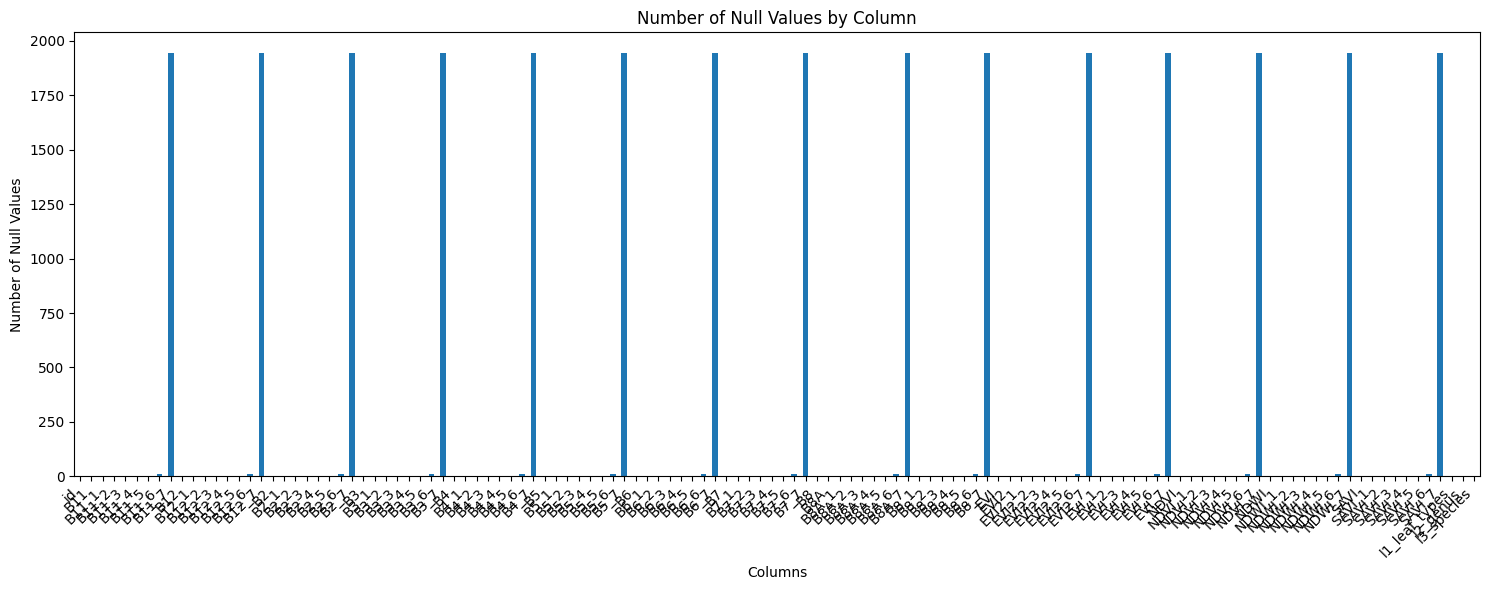

In [6]:
plt.figure(figsize=(15, 6))
nullds[nullds >= 0].plot(kind='bar')
plt.title('Number of Null Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [7]:
# drop rows containing null values
select_df = select_df.dropna()

# drop rows containing 'none' (in any case) in any column
select_df = select_df[~select_df.apply(lambda row: row.astype(str).str.lower().eq('none').any(), axis=1)]

nullds = select_df.isnull().sum()
print(nullds)

id               0
B11              0
B11_1            0
B11_2            0
B11_3            0
                ..
SAVI_6           0
SAVI_7           0
l1_leaf_types    0
l2_genus         0
l3_species       0
Length: 124, dtype: int64


In [19]:
# load the labels
labels = np.array(select_df[['l1_leaf_types', 'l2_genus','l3_species']])
sen2 = np.array(select_df[['B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B8', 'B8A', 'B8A_1', 'B8A_2','B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6','NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6']])
#sen2 = np.array(select_df[['B11', 'B12','B2', 'B3', 'B4','B5','B6','B7','B8', 'B8A', 'EVI', 'EVI2', 'NDVI', 'NDWI', 'SAVI']])
# show the shape
print("Labels shape: " + str(labels.shape))
#print("Sen2 shape: " + str(sen2.shape))

# print the labels
print(labels[:])
print(sen2[:])
print(sen2.shape)

Labels shape: (35965, 3)
[['broadleaf' 'long-lived deciduous' 'linden']
 ['broadleaf' 'long-lived deciduous' 'linden']
 ['broadleaf' 'long-lived deciduous' 'linden']
 ...
 ['broadleaf' 'short-lived deciduous' 'alder']
 ['broadleaf' 'short-lived deciduous' 'alder']
 ['broadleaf' 'short-lived deciduous' 'alder']]
[['[ [ 0.28049999475479126, 0.28049999475479126, 0.29100000858306885, 0.29100000858306885, 0.29100000858306885 ], [ 0.29429998993873596, 0.29429998993873596, 0.29330000281333923, 0.29330000281333923, 0.29330000281333923 ], [ 0.29429998993873596, 0.29429998993873596, 0.29330000281333923, 0.29330000281333923, 0.29330000281333923 ], [ 0.28009998798370361, 0.28009998798370361, 0.27129998803138733, 0.27129998803138733, 0.27129998803138733 ], [ 0.28009998798370361, 0.28009998798370361, 0.27129998803138733, 0.27129998803138733, 0.27129998803138733 ] ]'
  '[ [ 0.30849999189376831, 0.30849999189376831, 0.31549999117851257, 0.31549999117851257, 0.31549999117851257 ], [ 0.31130000948905945

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# load the labels
labels_l1 = np.array(select_df[['l1_leaf_types']])
labels_l2 = np.array(select_df[['l2_genus']])
labels_l3 = np.array(select_df[['l3_species']])


encoder = OneHotEncoder(sparse_output=False)
labels_l1 = encoder.fit_transform(labels_l1.reshape(-1, 1))
labels_l2 = encoder.fit_transform(labels_l2.reshape(-1, 1))
labels_l3 = encoder.fit_transform(labels_l3.reshape(-1, 1))
#print("Labels shape: " + str(labels.shape))
#print("\nFirst 19 rows:")

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np

print("Initial shapes:")
print(f"labels_l1: {labels_l1.shape}")
print(f"labels_l2: {labels_l2.shape}")
print(f"labels_l3: {labels_l3.shape}")
print(f"sen2: {sen2.shape}")

print(labels_l1.dtype)
print(labels_l2.dtype)
print(labels_l3.dtype)
print(sen2.dtype)

Initial shapes:
labels_l1: (35965, 2)
labels_l2: (35965, 9)
labels_l3: (35965, 19)
sen2: (35965, 105)
float64
float64
float64
object


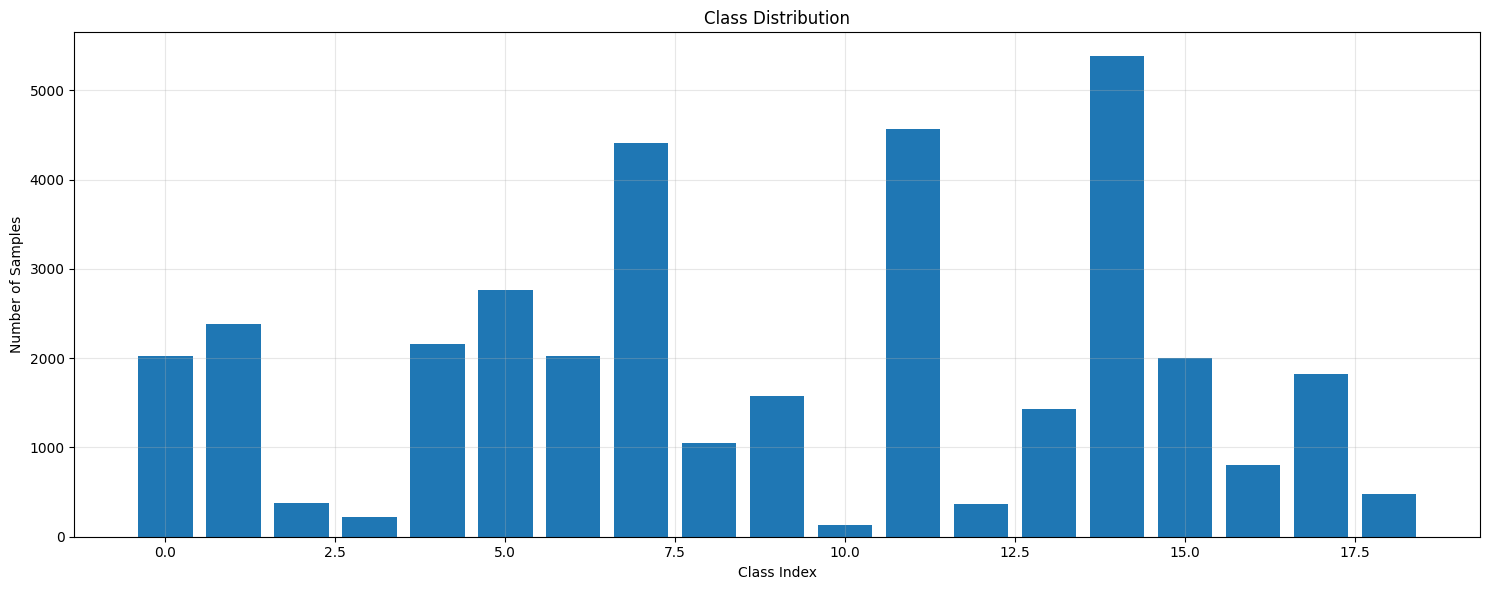

In [22]:
# Get the sum of each column (class counts)
class_sizes = np.sum(labels_l3, axis=0)

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(range(len(class_sizes)), class_sizes)

# Add labels and title
plt.title('Class Distribution')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')

# Adjust layout
plt.tight_layout()

# Add grid for better readability
plt.grid(True, alpha=0.3)

In [23]:
# Convert string representation of arrays to actual numpy arrays
def convert_string_to_array(s):
	# Using ast.literal_eval to safely evaluate the string as a Python literal
	array_data = ast.literal_eval(s)
	return np.array(array_data)

# Convert all elements in sen2 to numpy arrays
sen2_arrays = np.array([convert_string_to_array(x) for x in sen2.flatten()])
number_samples = sen2.shape[0]
sen2_reshaped = sen2_arrays.reshape(number_samples, -1)

print("Post-processed Sentinel-2 data shape: ", sen2_reshaped.shape)

Post-processed Sentinel-2 data shape:  (35965, 2625)


In [24]:
from imblearn.over_sampling import SMOTE

# Create a dictionary for multiple classes
sampling_strategy = {
    0: 5000,
    1: 5000,
    2: 5000,  
    3: 5000,
    4: 5000,  
    5: 5000,   
    6: 5000,
    7: 5000,
    8: 5000,
    9: 5000,
    10: 5000,
    11: 6200,
    12: 5000,
    13: 5000,
    14: 6200,
    15: 5000,
    16: 5000,
    17: 5000,
    18: 5000
}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, l3_resampled = smote.fit_resample(sen2_reshaped, np.argmax(labels_l3, axis=1))


# Update the labels_l3 with the resampled data
labels_l3_resampled = encoder.fit_transform(l3_resampled.reshape(-1, 1))

Resampled shapes: (97400, 2625) (97400, 19)


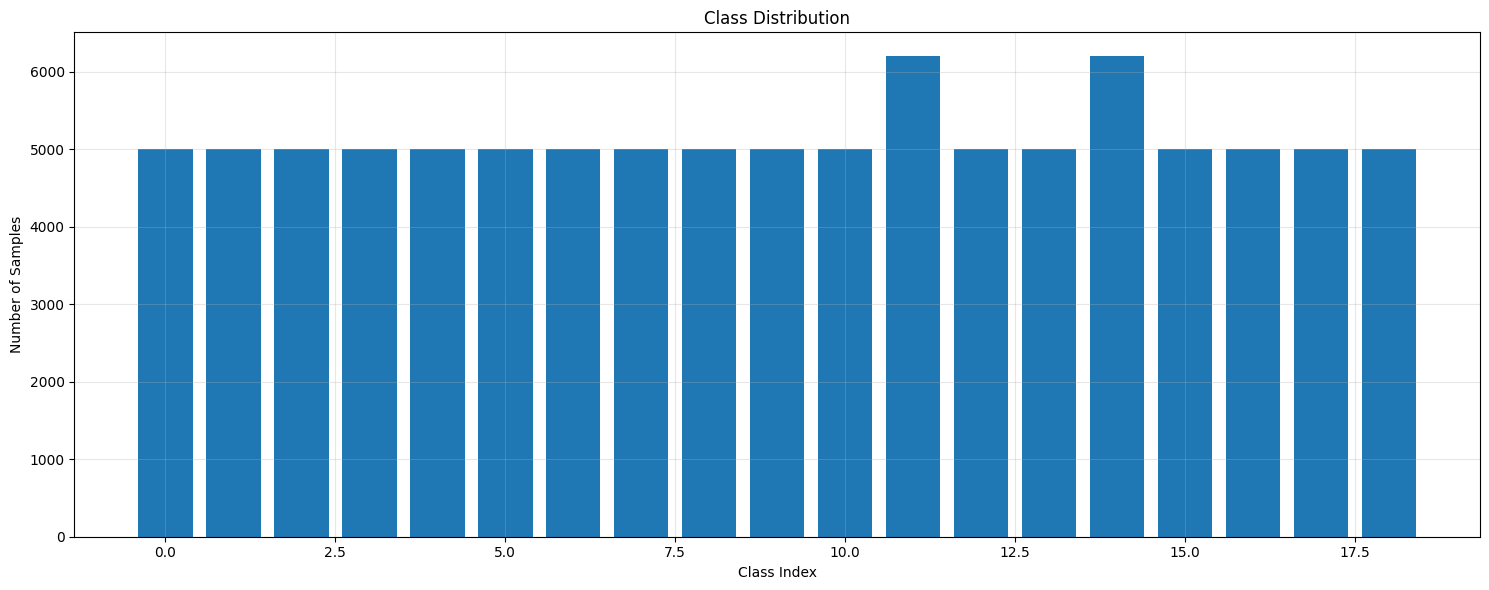

In [25]:
print("Resampled shapes:", X_resampled.shape, labels_l3_resampled.shape)

# Get the sum of each column (class counts)
class_sizes = np.sum(labels_l3_resampled, axis=0)

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(range(len(class_sizes)), class_sizes)

# Add labels and title
plt.title('Class Distribution')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')

# Adjust layout
plt.tight_layout()

# Add grid for better readability
plt.grid(True, alpha=0.3)

Resampled shapes: (97400, 19)
Resampled shapes: (97400, 2) (97400, 9)


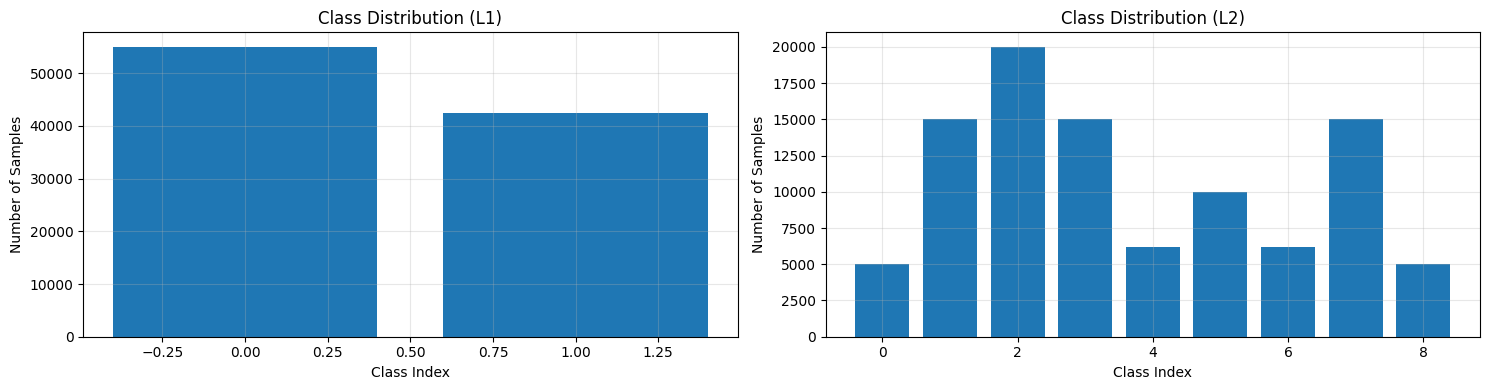

In [26]:
# 0 -> 0, 1 ,2, 3
  # 0 -> 0
  # 1 -> 1, 2, 3
  # 2 -> 4, 5, 6, 7
  # 3 -> 8, 9, 10
# 1 -> 4, 5, 6, 7, 8
  # 4 -> 11
  # 5 -> 12, 13
  # 6 -> 14
  # 7 -> 15, 16 ,17
  # 8 -> 18


l3_to_l2_l1 = {
    0: (0, 0),  # "european beech" -> beech -> broadleaf
    1: (1, 0),  # "sessile oak"    -> oak   -> broadleaf
    2: (1, 0),  # "english oak"    -> oak   -> broadleaf
    3: (1, 0),  # "red oak"        -> oak   -> broadleaf
    4: (2, 0),  # "sycamore maple" -> long-lived dec. -> broadleaf
    5: (2, 0),  # “european ash”   -> long-lived dec. -> broadleaf
    6: (2, 0),
    7: (2, 0),
    8: (3, 0),
    9: (3, 0),
    10: (3, 0),
    # ...
    11: (4, 1), # "silver birch"   -> birch -> broadleaf
    12: (5, 1),
    13: (5, 1),
    14: (6, 1), # "norway spruce"  -> spruce -> needleleaf
    15: (7, 1), # "scots pine"     -> pine   -> needleleaf
    16: (7, 1), # "black pine"     -> pine   -> needleleaf
    17: (7, 1), # "weymouth pine"  -> pine   -> needleleaf
    18: (8, 1)  # "douglas fir"    -> douglas fir -> needleleaf
}

# Initialize resampled labels with the same number of rows as labels_l3_resampled
num_samples = labels_l3_resampled.shape[0]
num_l1_classes = labels_l1.shape[1]
num_l2_classes = labels_l2.shape[1]

labels_l1_resampled = np.zeros((num_samples, num_l1_classes))
labels_l2_resampled = np.zeros((num_samples, num_l2_classes))


for i in range(len(labels_l3_resampled)):
    l3_onehot = labels_l3_resampled[i]
    l3_idx = np.argmax(l3_onehot)  # which species is 1
    (correct_l2_idx, correct_l1_idx) = l3_to_l2_l1[l3_idx]

    # Zero out and set the corrected one-hot for L2
    labels_l2_resampled[i, :] = 0
    labels_l2_resampled[i, correct_l2_idx] = 1
    
    # Zero out and set the corrected one-hot for L1
    labels_l1_resampled[i, :] = 0
    labels_l1_resampled[i, correct_l1_idx] = 1

print("Resampled shapes:", labels_l3_resampled.shape)
print("Resampled shapes:", labels_l1_resampled.shape, labels_l2_resampled.shape)
# Get the sum of each column (class counts)
plt.figure(figsize=(15, 4))

# Plot for labels_l1_resampled
plt.subplot(1, 2, 1)
class_sizes_l1 = np.sum(labels_l1_resampled, axis=0)
plt.bar(range(len(class_sizes_l1)), class_sizes_l1)
plt.title('Class Distribution (L1)')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.grid(True, alpha=0.3)

# Plot for labels_l2_resampled
plt.subplot(1, 2, 2)
class_sizes_l2 = np.sum(labels_l2_resampled, axis=0)
plt.bar(range(len(class_sizes_l2)), class_sizes_l2)
plt.title('Class Distribution (L2)')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.grid(True, alpha=0.3)

plt.tight_layout()

In [27]:
X_l1 = X_resampled
TRAIN_SPLIT = int(number_samples * .8)

X_l1_train = X_l1[:TRAIN_SPLIT,:]
X_l1_test = X_l1[TRAIN_SPLIT:,:]

In [28]:
X_l1_train.shape, X_l1_test.shape, X_l1.shape

((28772, 2625), (68628, 2625), (97400, 2625))

In [29]:
# The labels are one hot encoded, but the random forest requires
# the class number
y_train_l1 = np.argmax(labels_l1[0:TRAIN_SPLIT,:], axis=1)
y_test_l1 = np.argmax(labels_l1[TRAIN_SPLIT:97400,:], axis=1)

print("Post-processed train labels shape: ", y_train_l1.shape)

Post-processed train labels shape:  (28772,)


TRAIN: [    1     2     4 ... 28761 28764 28765] TEST: [    0     3    11 ... 28769 28770 28771]
TRAIN: [    0     2     3 ... 28769 28770 28771] TEST: [    1     4     5 ... 28759 28761 28765]
TRAIN: [    0     1     3 ... 28769 28770 28771] TEST: [    2     7     8 ... 28758 28760 28764]
Accuracies:  [0.8956313210301324, 0.8934417683244709, 0.8947862356621481]
Mean Accuracy:  0.8946197750055838
F1 Scores:  [0.8950054250509991, 0.892793205607628, 0.8940148512790267]
Mean F1 Score:  0.8939378273125512


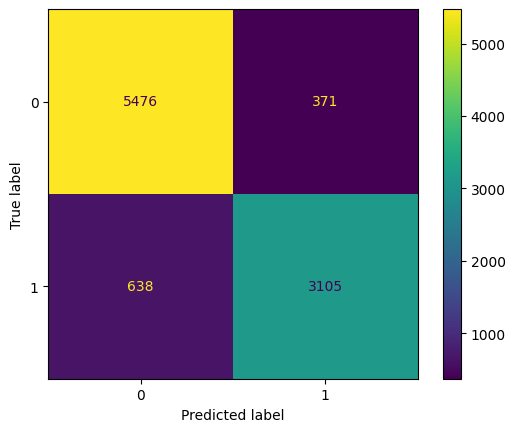

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
import numpy as np

import matplotlib.pyplot as plt

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
class_weights = {
    0: 1.0,  # Example weight for class 0
    1: 2.5,  # Higher weight for poor-performing class 1
}
# Arrays to store the results
accuracies = []
f1_scores = []
confusion_matrices = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X_l1_train, y_train_l1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_train_l1[train_index], y_train_l1[test_index]
    
    # Train the Random Forest Classifier
    rf_classifier_l1 = RandomForestClassifier(random_state=42, n_estimators=100, class_weight=class_weights)
    rf_classifier_l1.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = rf_classifier_l1.predict(X_test)
    
    # Calculate accuracy and F1 score
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the results
    accuracies.append(acc)
    f1_scores.append(f1)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Display the results
print("Accuracies: ", accuracies)
print("Mean Accuracy: ", np.mean(accuracies))
print("F1 Scores: ", f1_scores)
print("Mean F1 Score: ", np.mean(f1_scores))

# Display the confusion matrix for the last fold
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


'B11', 'B12','B2', 'B3', 'B4','B5','B6','B7','B8', 'B8A', 'EVI', 'EVI2', 'NDVI', 'NDWI', 'SAVI']])

Accuracies:  [0.8347523892267593, 0.8354474370112945, 0.8333333333333334, 0.8269030239833159, 0.8310740354535975]
Mean Accuracy:  0.8323020438016602
F1 Scores:  [0.8311659066751622, 0.8314758474236719, 0.8289096829701657, 0.8226378241852179, 0.8267615426166474]
Mean F1 Score:  0.8281901607741731

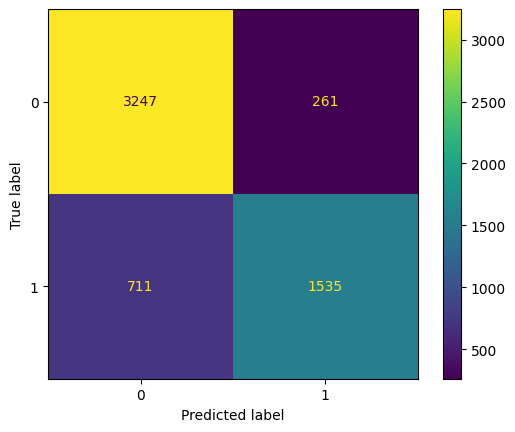

'B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B8', 'B8A', 'B8A_1', 'B8A_2','B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6','NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6'
Accuracies:  [0.9004344048653344, 0.9007819287576021, 0.8993743482794577, 0.8992005561348627, 0.897115050399722]
Mean Accuracy:  0.8993812576873956
F1 Scores:  [0.9000237061022109, 0.9002203342906274, 0.8990424982336276, 0.898694013349456, 0.8965581342789531]
Mean F1 Score:  0.8989077372509751

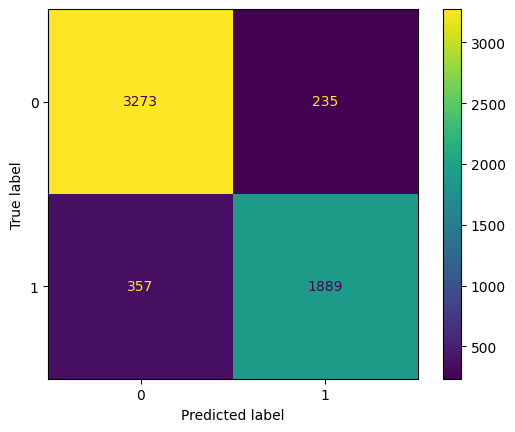

In [31]:
input_file = "data/combined_data_test.geojson"
## Read combined data
test_gdf = gpd.read_file(input_file)

print(test_gdf.head())
print(test_gdf.crs)
print(test_gdf.columns.to_list())
test_gdf.crs = "EPSG:25832"
print(test_gdf.crs)
print(test_gdf.shape)

# for now, we just select the NDVI, and keep id&species
select_col_test = ['id', 'B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B11_7', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B12_7', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B2_7', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B3_7', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B4_7', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B5_7', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B7_7', 'B8', 'B8A', 'B8A_1', 'B8A_2', 'B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8A_7', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'B8_7', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6', 'EVI_7', 'NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'NDWI_7', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6', 'SAVI_7', 'l1_leaf_types', 'l2_genus', 'l3_species']

select_df_test = test_gdf[select_col_test]

# load the labels
labels_test = np.array(select_df_test[['l1_leaf_types', 'l2_genus','l3_species']])
sen2_test = np.array(select_df_test[['B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B8', 'B8A', 'B8A_1', 'B8A_2','B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6','NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6']])
# show the shape
print("Labels shape: " + str(labels_test.shape))
#print("Sen2 shape: " + str(sen2.shape))

# print the labels
print(labels_test[:])
print(sen2_test[:])
print(sen2_test.shape)

# drop rows containing null values
select_df_test = select_df_test.dropna()

# drop rows containing 'none' (in any case) in any column
select_df_test = select_df_test[~select_df_test.apply(lambda row: row.astype(str).str.lower().eq('none').any(), axis=1)]

nullds = select_df_test.isnull().sum()
print(nullds)

# load the labels
labels_l1_test = np.array(select_df_test[['l1_leaf_types']])
labels_l2_test = np.array(select_df_test[['l2_genus']])
labels_l3_test = np.array(select_df_test[['l3_species']])


encoder = OneHotEncoder(sparse_output=False)
labels_l1_test = encoder.fit_transform(labels_l1_test.reshape(-1, 1))
labels_l2_test = encoder.fit_transform(labels_l2_test.reshape(-1, 1))
labels_l3_test = encoder.fit_transform(labels_l3_test.reshape(-1, 1))

print("Initial shapes:")
print(f"labels_l1: {labels_l1_test.shape}")
print(f"labels_l2: {labels_l2_test.shape}")
print(f"labels_l3: {labels_l3_test.shape}")
print(f"sen2: {sen2_test.shape}")

print(labels_l1_test.dtype)
print(labels_l2_test.dtype)
print(labels_l3_test.dtype)
print(sen2_test.dtype)


# Convert string representation of arrays to actual numpy arrays
def convert_string_to_array(s):
	if s is None or s == "None":
		return np.array([])
	# Using ast.literal_eval to safely evaluate the string as a Python literal
	array_data = ast.literal_eval(s)
	return np.array(array_data).flatten()

# Convert all elements in sen2 to numpy arrays, then pad them to the same length
sen2_test_arrays_list = [convert_string_to_array(x) for x in sen2_test.flatten()]
max_len = max(len(arr) for arr in sen2_test_arrays_list)
padded_arrays = []
for arr in sen2_test_arrays_list:
	pad_len = max_len - len(arr)
	padded_arrays.append(np.pad(arr, (0, pad_len), mode='constant', constant_values=np.nan))
sen2_test_arrays = np.array(padded_arrays)

number_samples = sen2_test.shape[0]
sen2_test_reshaped = sen2_test_arrays.reshape(number_samples, -1)

print("Post-processed Sentinel-2 data shape: ", sen2_test_reshaped.shape)

                     id                                                B11  \
0  00000000000000000d5f  [ [ 0.18850000202655792, 0.18850000202655792, ...   
1  00000000000000000d60  [ [ 0.15530000627040863, 0.15530000627040863, ...   
2  00000000000000000d61  [ [ 0.19709999859333038, 0.19519999623298645, ...   
3  00000000000000000d62  [ [ 0.24719999730587006, 0.24120000004768372, ...   
4  00000000000000000d63  [ [ 0.26109999418258667, 0.26109999418258667, ...   

                                               B11_1  \
0  [ [ 0.19804999232292175, 0.19804999232292175, ...   
1  [ [ 0.17280000448226929, 0.17280000448226929, ...   
2  [ [ 0.2070000022649765, 0.20430000126361847, 0...   
3  [ [ 0.3010999858379364, 0.30419999361038208, 0...   
4                                               None   

                                               B11_2  \
0  [ [ 0.19615000486373901, 0.19615000486373901, ...   
1  [ [ 0.18860000371932983, 0.18860000371932983, ...   
2  [ [ 0.22450000047683716

Accuracy: 0.6352848101265823

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.79      0.71      2129
           1       0.62      0.44      0.52      1663

    accuracy                           0.64      3792
   macro avg       0.63      0.61      0.61      3792
weighted avg       0.63      0.64      0.62      3792



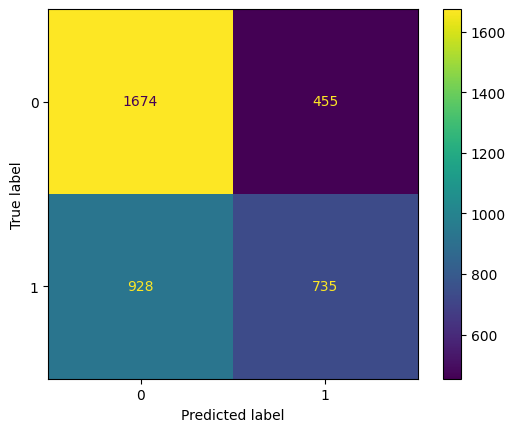

In [42]:
y_test_l1 = np.argmax(labels_l1_test, axis=1)

pred_l1_test = rf_classifier_l1.predict(sen2_test_reshaped[:len(y_test_l1)])
# Evaluate predictions
print("Accuracy:", accuracy_score(y_test_l1, pred_l1_test))
print("\nClassification Report:")
print(classification_report(y_test_l1, pred_l1_test))

ConfusionMatrixDisplay.from_predictions(y_test_l1, pred_l1_test)
plt.show()

Test accuracy l1 all columns:
Accuracy: 0.635548523206751

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.79      0.71      2129
           1       0.62      0.44      0.52      1663

    accuracy                           0.64      3792
   macro avg       0.63      0.61      0.61      3792
weighted avg       0.63      0.64      0.62      3792

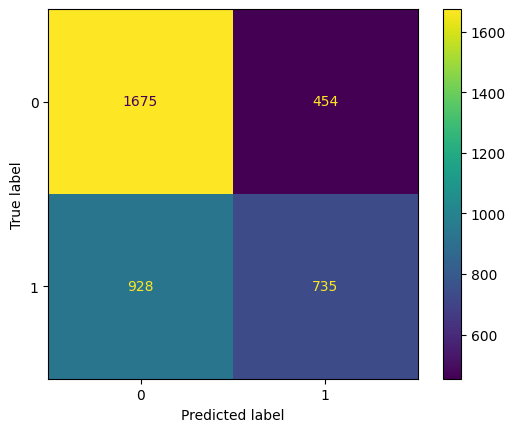


Fold 1
Fold 1 Accuracy: 0.6848
Fold 1 Macro F1: 0.6947
Fold 1 Weighted F1: 0.6855
Per-class F1 scores: {0: '0.5132', 1: '0.6839', 2: '0.6047', 3: '0.7856', 4: '0.6923', 5: '0.7330', 6: '0.7037', 7: '0.6406', 8: '0.8951'}

Fold 2
Fold 2 Accuracy: 0.6877
Fold 2 Macro F1: 0.6966
Fold 2 Weighted F1: 0.6892
Per-class F1 scores: {0: '0.4902', 1: '0.6782', 2: '0.6101', 3: '0.7871', 4: '0.6929', 5: '0.7427', 6: '0.7068', 7: '0.6582', 8: '0.9034'}

Final Results:
Mean Accuracy: 0.6863 (±0.0014)
Mean Weighted F1: 0.6874 (±0.0018)

Mean F1 score per class:
Class 0: 0.5017
Class 1: 0.6810
Class 2: 0.6074
Class 3: 0.7863
Class 4: 0.6926
Class 5: 0.7378
Class 6: 0.7052
Class 7: 0.6494
Class 8: 0.8993


<Figure size 1000x800 with 0 Axes>

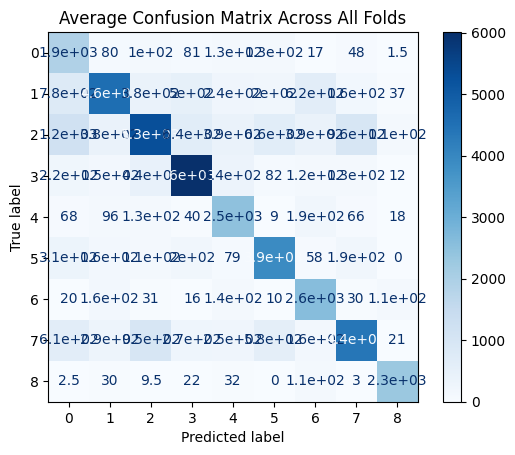

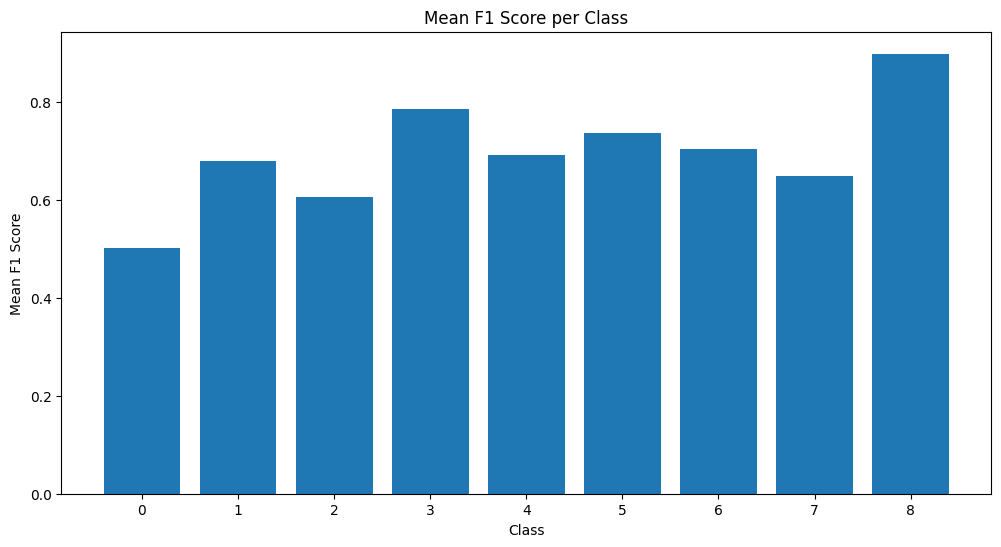

In [37]:
# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=2, random_state=42, shuffle=True)

# Arrays to store the results
accuracies = []
f1_scores = []
confusion_matrices = []
per_class_f1 = []  # Add per-class metrics

# Perform Stratified K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(skf.split(X_resampled, np.argmax(labels_l2_resampled, axis=1)), 1):
    print(f"\nFold {fold}")
    
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = np.argmax(labels_l2_resampled[train_index], axis=1), np.argmax(labels_l2_resampled[test_index], axis=1)
    
    # Train the Random Forest Classifier
    rf_classifier_l2 = RandomForestClassifier(
        max_depth=10,
        random_state=42,
        n_estimators=50,
        min_samples_split=5,
        min_samples_leaf=10,
        class_weight='balanced_subsample',
        n_jobs=-1  # Use all available cores
    )
    rf_classifier_l2.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = rf_classifier_l2.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    f1_per_class = f1_score(y_test, y_pred, average=None)
    
    # Store the results
    accuracies.append(acc)
    f1_scores.append(f1_weighted)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    per_class_f1.append(f1_per_class)
    
    # Print fold results
    print(f"Fold {fold} Accuracy: {acc:.4f}")
    print(f"Fold {fold} Macro F1: {f1_macro:.4f}")
    print(f"Fold {fold} Weighted F1: {f1_weighted:.4f}")
    print("Per-class F1 scores:", {i: f"{score:.4f}" for i, score in enumerate(f1_per_class)})

# Calculate and display final results
print("\nFinal Results:")
print(f"Mean Accuracy: {np.mean(accuracies):.4f} (±{np.std(accuracies):.4f})")
print(f"Mean Weighted F1: {np.mean(f1_scores):.4f} (±{np.std(f1_scores):.4f})")

# Calculate mean per-class F1 scores
mean_per_class_f1 = np.mean(per_class_f1, axis=0)
print("\nMean F1 score per class:")
for class_idx, f1 in enumerate(mean_per_class_f1):
    print(f"Class {class_idx}: {f1:.4f}")

# Plot confusion matrix (average across all folds)
plt.figure(figsize=(10, 8))
mean_cm = np.mean(confusion_matrices, axis=0)
ConfusionMatrixDisplay(
    confusion_matrix=mean_cm,
    display_labels=range(len(mean_per_class_f1))
).plot(cmap='Blues')
plt.title('Average Confusion Matrix Across All Folds')
plt.show()

# Plot F1 scores per class
plt.figure(figsize=(12, 6))
plt.bar(range(len(mean_per_class_f1)), mean_per_class_f1)
plt.xlabel('Class')
plt.ylabel('Mean F1 Score')
plt.title('Mean F1 Score per Class')
plt.xticks(range(len(mean_per_class_f1)))
plt.show()

Accuracy: 0.23839662447257384

Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.02      0.03       535
           1       0.05      0.03      0.04       362
           2       0.09      0.73      0.17       162
           3       0.07      0.26      0.12       145
           4       0.13      0.02      0.04       412
           5       0.48      0.05      0.09       781
           6       0.65      0.77      0.70       792
           7       0.34      0.16      0.22       401
           8       0.00      0.00      0.00       202

    accuracy                           0.24      3792
   macro avg       0.20      0.23      0.16      3792
weighted avg       0.30      0.24      0.21      3792



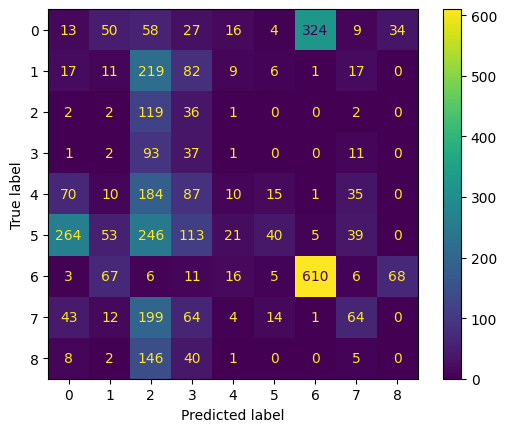

In [38]:
y_test_l2 = np.argmax(labels_l2_test, axis=1)

pred_l2_test = rf_classifier_l2.predict(sen2_test_reshaped[:len(y_test_l2)])
# Evaluate predictions
print("Accuracy:", accuracy_score(y_test_l2, pred_l2_test))
print("\nClassification Report:")
print(classification_report(y_test_l2, pred_l2_test))

ConfusionMatrixDisplay.from_predictions(y_test_l2, pred_l2_test)

In [96]:
import time
from sklearn.model_selection import GridSearchCV

# Add timing
start_time = time.time()

# Define parameter grid for tree classification
param_grid = {
    'n_estimators': [100, 125],
    'max_depth': [10, 12, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [30, 35],
}

# Initialize base classifier
rf_classifier_l3 = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

# Perform grid search on a smaller subset of the data
subset_size = 10000  # Adjust this value based on your memory constraints
X_subset = X_resampled[:subset_size]
y_subset = np.argmax(labels_l3_resampled, axis=1)[:subset_size]

# Perform grid search
grid_search = GridSearchCV(
    estimator=rf_classifier_l3,
    param_grid=param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

# Print execution time
print(f"Execution time: {time.time() - start_time:.2f} seconds")
# Fit grid search
grid_search.fit(X_subset, y_subset)

# Get best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Execution time: 0.02 seconds
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 35, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Best parameters: {'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


Fold 1
Fold 1 Accuracy: 0.5319
Fold 1 Macro F1: 0.5117
Fold 1 Weighted F1: 0.5142
Per-class F1 scores: {0: '0.3586', 1: '0.0689', 2: '0.5375', 3: '0.6431', 4: '0.7200', 5: '0.3410', 6: '0.2628', 7: '0.4661', 8: '0.3810', 9: '0.6256', 10: '0.6856', 11: '0.6044', 12: '0.5748', 13: '0.5955', 14: '0.6230', 15: '0.4989', 16: '0.6817', 17: '0.2992', 18: '0.7541'}

Fold 2
Fold 2 Accuracy: 0.5341
Fold 2 Macro F1: 0.5115
Fold 2 Weighted F1: 0.5142
Per-class F1 scores: {0: '0.3950', 1: '0.0554', 2: '0.5396', 3: '0.6553', 4: '0.7212', 5: '0.3315', 6: '0.2540', 7: '0.4861', 8: '0.3611', 9: '0.6145', 10: '0.6984', 11: '0.6060', 12: '0.5444', 13: '0.5959', 14: '0.6323', 15: '0.5071', 16: '0.6682', 17: '0.3084', 18: '0.7445'}

Fold 3
Fold 3 Accuracy: 0.5353
Fold 3 Macro F1: 0.5145
Fold 3 Weighted F1: 0.5170
Per-class F1 scores: {0: '0.3853', 1: '0.0697', 2: '0.5345', 3: '0.6516', 4: '0.7353', 5: '0.3279', 6: '0.2542', 7: '0.4780', 8: '0.3752', 9: '0.6126', 10: '0.6947', 11: '0.6070', 12: '0.5807', 1

<Figure size 1000x800 with 0 Axes>

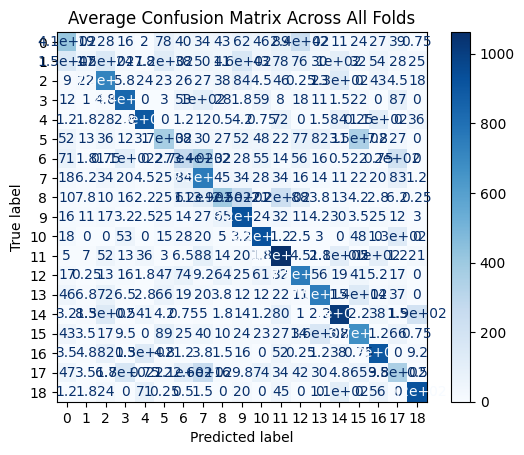

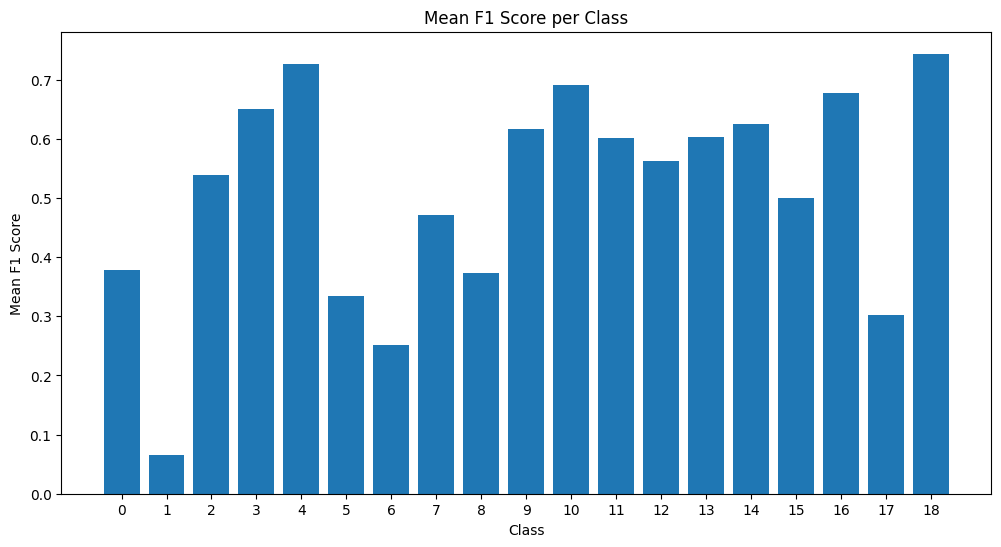

In [104]:
# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=4, random_state=None, shuffle=True)

class_weights = {
    0: 2.0,  # Example weight for class 0
    1: 1.8,  # Higher weight for poor-performing class 1
    2: 1.3,
    3: 2.0,
    4: 1.2,
    5: 1.8,
    6: 2.5,
    7: 2.5,
    8: 2.2,
    9: 1.7,
    10: 1.7,
    11: 1.5,
    12: 3.0,
    13: 1.3,
    14: 1.1,
    15: 1.9,
    16: 2.5,  # Higher weight for poorly performing class 16
    17: 2.5,
    18: 1.7
}

# Arrays to store the results
accuracies = []
f1_scores = []
confusion_matrices = []
per_class_f1 = []  # Add per-class metrics

# Perform Stratified K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(skf.split(X_resampled, np.argmax(labels_l3_resampled, axis=1)), 1):
    print(f"\nFold {fold}")
    
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = np.argmax(labels_l3_resampled[train_index], axis=1), np.argmax(labels_l3_resampled[test_index], axis=1)
    
    # Train the Random Forest Classifier with adjusted parameters to reduce overfitting
    rf_classifier_l3 = RandomForestClassifier(           # Reduced from original
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        max_features=best_params['max_features'],
        max_leaf_nodes=best_params['max_leaf_nodes'],
        class_weight= 'balanced',      # Use entropy for information gain
        n_jobs=-1,                  # Use all available cores
        #oob_score=True             # Enable out-of-bag score to monitor overfitting
    )
    rf_classifier_l3.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = rf_classifier_l3.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    f1_per_class = f1_score(y_test, y_pred, average=None)
    
    # Store the results
    accuracies.append(acc)
    f1_scores.append(f1_weighted)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    per_class_f1.append(f1_per_class)
    
    # Print fold results
    print(f"Fold {fold} Accuracy: {acc:.4f}")
    print(f"Fold {fold} Macro F1: {f1_macro:.4f}")
    print(f"Fold {fold} Weighted F1: {f1_weighted:.4f}")
    print("Per-class F1 scores:", {i: f"{score:.4f}" for i, score in enumerate(f1_per_class)})

# Calculate and display final results
print("\nFinal Results:")
print(f"Mean Accuracy: {np.mean(accuracies):.4f} (±{np.std(accuracies):.4f})")
print(f"Mean Weighted F1: {np.mean(f1_scores):.4f} (±{np.std(f1_scores):.4f})")

# Calculate mean per-class F1 scores
mean_per_class_f1 = np.mean(per_class_f1, axis=0)
print("\nMean F1 score per class:")
for class_idx, f1 in enumerate(mean_per_class_f1):
    print(f"Class {class_idx}: {f1:.4f}")

# Plot confusion matrix (average across all folds)
plt.figure(figsize=(10, 8))
mean_cm = np.mean(confusion_matrices, axis=0)
ConfusionMatrixDisplay(
    confusion_matrix=mean_cm,
    display_labels=range(len(mean_per_class_f1))
).plot(cmap='Blues')
plt.title('Average Confusion Matrix Across All Folds')
plt.show()

# Plot F1 scores per class
plt.figure(figsize=(12, 6))
plt.bar(range(len(mean_per_class_f1)), mean_per_class_f1)
plt.xlabel('Class')
plt.ylabel('Mean F1 Score')
plt.title('Mean F1 Score per Class')
plt.xticks(range(len(mean_per_class_f1)))
plt.show()

In [51]:
input_file = "data/combined_data_test.geojson"
## Read combined data
test_gdf = gpd.read_file(input_file)

In [52]:
print(test_gdf.head())
print(test_gdf.crs)
print(test_gdf.columns.to_list())
test_gdf.crs = "EPSG:25832"
print(test_gdf.crs)
print(test_gdf.shape)

                     id                                                B11  \
0  00000000000000000d5f  [ [ 0.18850000202655792, 0.18850000202655792, ...   
1  00000000000000000d60  [ [ 0.15530000627040863, 0.15530000627040863, ...   
2  00000000000000000d61  [ [ 0.19709999859333038, 0.19519999623298645, ...   
3  00000000000000000d62  [ [ 0.24719999730587006, 0.24120000004768372, ...   
4  00000000000000000d63  [ [ 0.26109999418258667, 0.26109999418258667, ...   

                                               B11_1  \
0  [ [ 0.19804999232292175, 0.19804999232292175, ...   
1  [ [ 0.17280000448226929, 0.17280000448226929, ...   
2  [ [ 0.2070000022649765, 0.20430000126361847, 0...   
3  [ [ 0.3010999858379364, 0.30419999361038208, 0...   
4                                               None   

                                               B11_2  \
0  [ [ 0.19615000486373901, 0.19615000486373901, ...   
1  [ [ 0.18860000371932983, 0.18860000371932983, ...   
2  [ [ 0.22450000047683716

In [53]:
# for now, we just select the NDVI, and keep id&species
select_col_test = ['id', 'B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B11_7', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B12_7', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B2_7', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B3_7', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B4_7', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B5_7', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B7_7', 'B8', 'B8A', 'B8A_1', 'B8A_2', 'B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8A_7', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'B8_7', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6', 'EVI_7', 'NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'NDWI_7', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6', 'SAVI_7', 'l1_leaf_types', 'l2_genus', 'l3_species']

select_df_test = test_gdf[select_col_test]

# load the labels
labels_test = np.array(select_df_test[['l1_leaf_types', 'l2_genus','l3_species']])
sen2_test = np.array(select_df_test[['B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B8', 'B8A', 'B8A_1', 'B8A_2','B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6','NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6']])
# show the shape
print("Labels shape: " + str(labels_test.shape))
#print("Sen2 shape: " + str(sen2.shape))

# print the labels
print(labels_test[:])
print(sen2_test[:])
print(sen2_test.shape)

Labels shape: (8351, 3)
[['needleleaf' 'pine' 'scots pine']
 ['needleleaf' 'pine' 'scots pine']
 ['needleleaf' 'pine' 'scots pine']
 ...
 ['broadleaf' 'oak' 'english oak']
 ['broadleaf' 'oak' 'english oak']
 ['broadleaf' 'oak' 'english oak']]
[['[ [ 0.18850000202655792, 0.18850000202655792, 0.20579999685287476, 0.20579999685287476, 0.20579999685287476 ], [ 0.18850000202655792, 0.18850000202655792, 0.20579999685287476, 0.20579999685287476, 0.20579999685287476 ], [ 0.18269999325275421, 0.18269999325275421, 0.19840000569820404, 0.19840000569820404, 0.19840000569820404 ], [ 0.18269999325275421, 0.18269999325275421, 0.19840000569820404, 0.19840000569820404, 0.19840000569820404 ], [ 0.18389999866485596, 0.18389999866485596, 0.19859999418258667, 0.19859999418258667, 0.19859999418258667 ] ]'
  '[ [ 0.19804999232292175, 0.19804999232292175, 0.21400000154972076, 0.21400000154972076, 0.21400000154972076 ], [ 0.19804999232292175, 0.19804999232292175, 0.21400000154972076, 0.21400000154972076, 0.214

In [54]:
# drop rows containing null values
select_df_test = select_df_test.dropna()

# drop rows containing 'none' (in any case) in any column
select_df_test = select_df_test[~select_df_test.apply(lambda row: row.astype(str).str.lower().eq('none').any(), axis=1)]

nullds = select_df_test.isnull().sum()
print(nullds)

id               0
B11              0
B11_1            0
B11_2            0
B11_3            0
                ..
SAVI_6           0
SAVI_7           0
l1_leaf_types    0
l2_genus         0
l3_species       0
Length: 124, dtype: int64


In [56]:
# load the labels
labels_l1_test = np.array(select_df_test[['l1_leaf_types']])
labels_l2_test = np.array(select_df_test[['l2_genus']])
labels_l3_test = np.array(select_df_test[['l3_species']])


encoder = OneHotEncoder(sparse_output=False)
labels_l1_test = encoder.fit_transform(labels_l1_test.reshape(-1, 1))
labels_l2_test = encoder.fit_transform(labels_l2_test.reshape(-1, 1))
labels_l3_test = encoder.fit_transform(labels_l3_test.reshape(-1, 1))

In [57]:
print("Initial shapes:")
print(f"labels_l1: {labels_l1_test.shape}")
print(f"labels_l2: {labels_l2_test.shape}")
print(f"labels_l3: {labels_l3_test.shape}")
print(f"sen2: {sen2_test.shape}")

print(labels_l1_test.dtype)
print(labels_l2_test.dtype)
print(labels_l3_test.dtype)
print(sen2_test.dtype)

Initial shapes:
labels_l1: (3792, 2)
labels_l2: (3792, 9)
labels_l3: (3792, 19)
sen2: (8351, 105)
float64
float64
float64
object


In [61]:

# Convert string representation of arrays to actual numpy arrays
def convert_string_to_array(s):
	if s is None or s == "None":
		return np.array([])
	# Using ast.literal_eval to safely evaluate the string as a Python literal
	array_data = ast.literal_eval(s)
	return np.array(array_data).flatten()

# Convert all elements in sen2 to numpy arrays, then pad them to the same length
sen2_test_arrays_list = [convert_string_to_array(x) for x in sen2_test.flatten()]
max_len = max(len(arr) for arr in sen2_test_arrays_list)
padded_arrays = []
for arr in sen2_test_arrays_list:
	pad_len = max_len - len(arr)
	padded_arrays.append(np.pad(arr, (0, pad_len), mode='constant', constant_values=np.nan))
sen2_test_arrays = np.array(padded_arrays)

number_samples = sen2_test.shape[0]
sen2_test_reshaped = sen2_test_arrays.reshape(number_samples, -1)

print("Post-processed Sentinel-2 data shape: ", sen2_test_reshaped.shape)

Post-processed Sentinel-2 data shape:  (8351, 2625)


Accuracy: 0.12895569620253164

Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       196
           1       0.00      0.00      0.00       173
           2       0.00      0.00      0.00         5
           3       0.01      0.04      0.01        26
           4       0.00      0.00      0.00       362
           5       0.11      0.03      0.05       244
           6       0.00      0.00      0.00        83
           7       0.00      0.00      0.00       535
           8       0.03      0.08      0.04       104
           9       0.00      0.00      0.00        41
          10       0.00      0.00      0.00         2
          11       0.02      0.00      0.01       202
          12       0.01      0.12      0.02        32
          13       0.44      0.02      0.04       217
          14       0.59      0.38      0.47       767
          15       0.06      0.03      0.04       320
          16       0.00    

c:\Users\berky\.conda\envs\dseo\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\berky\.conda\envs\dseo\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\berky\.conda\envs\dseo\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


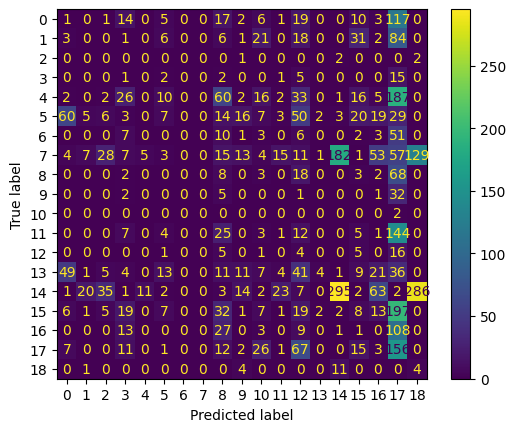

In [103]:
y_test_l3 = np.argmax(labels_l3_test, axis=1)

pred = rf_classifier_l3.predict(sen2_test_reshaped[:len(y_test_l3)])
# Evaluate predictions
print("Accuracy:", accuracy_score(y_test_l3, pred))
print("\nClassification Report:")
print(classification_report(y_test_l3, pred))

ConfusionMatrixDisplay.from_predictions(y_test_l3, pred)
plt.show()

